In [30]:
%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import numpy as np
import qcgpu

set_matplotlib_formats('png', 'pdf')
plt.style.use('ggplot')

In [31]:
num_qubits = 2

state = qcgpu.State(num_qubits)
h = qcgpu.gate.h()
x = qcgpu.gate.x()
y = qcgpu.gate.y()
z = qcgpu.gate.z()

state.apply_gate(h, 0)
state.apply_gate(y, 0)
state.apply_gate(z, 1)
state.apply_gate(y, 0)
state.apply_controlled_gate(x, 0, 1)
state.apply_gate(x, 1)
state.apply_gate(y, 0)
state.apply_gate(z, 1)
state.apply_gate(y, 1)

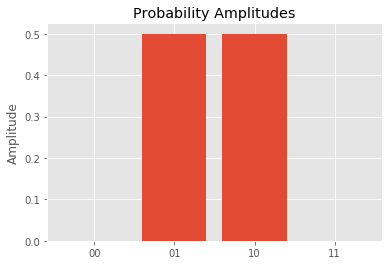

In [32]:
labels = map(
    lambda i: np.binary_repr(i, state.num_qubits), 
    range(0, 2**state.num_qubits)
)

y_pos = np.arange(len(labels))
performance = list(state.probabilities())
 
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, labels)
plt.ylabel('Amplitude')
plt.title('Probability Amplitudes')
 
plt.show()

